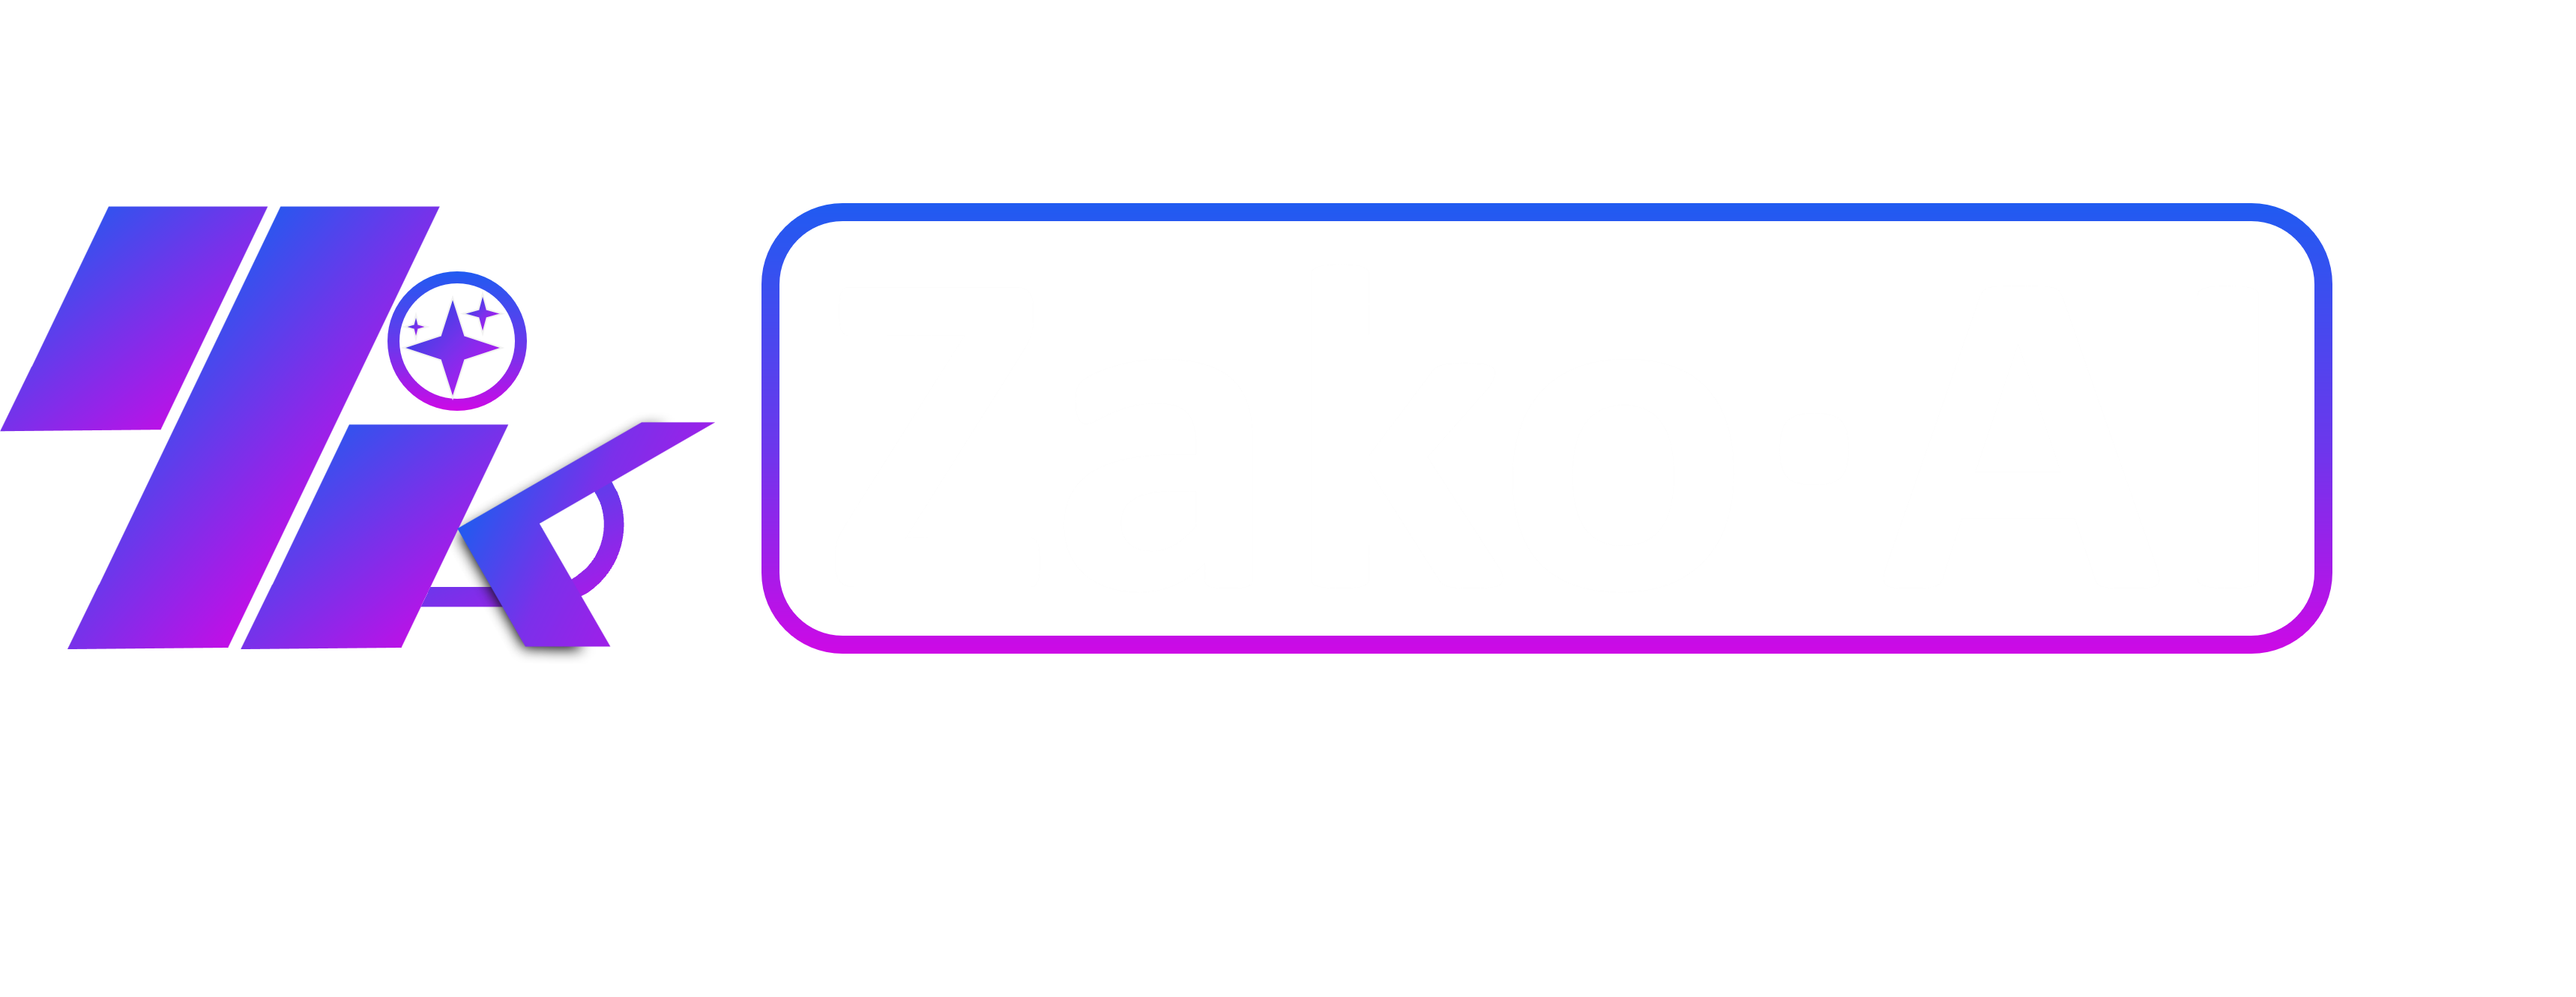
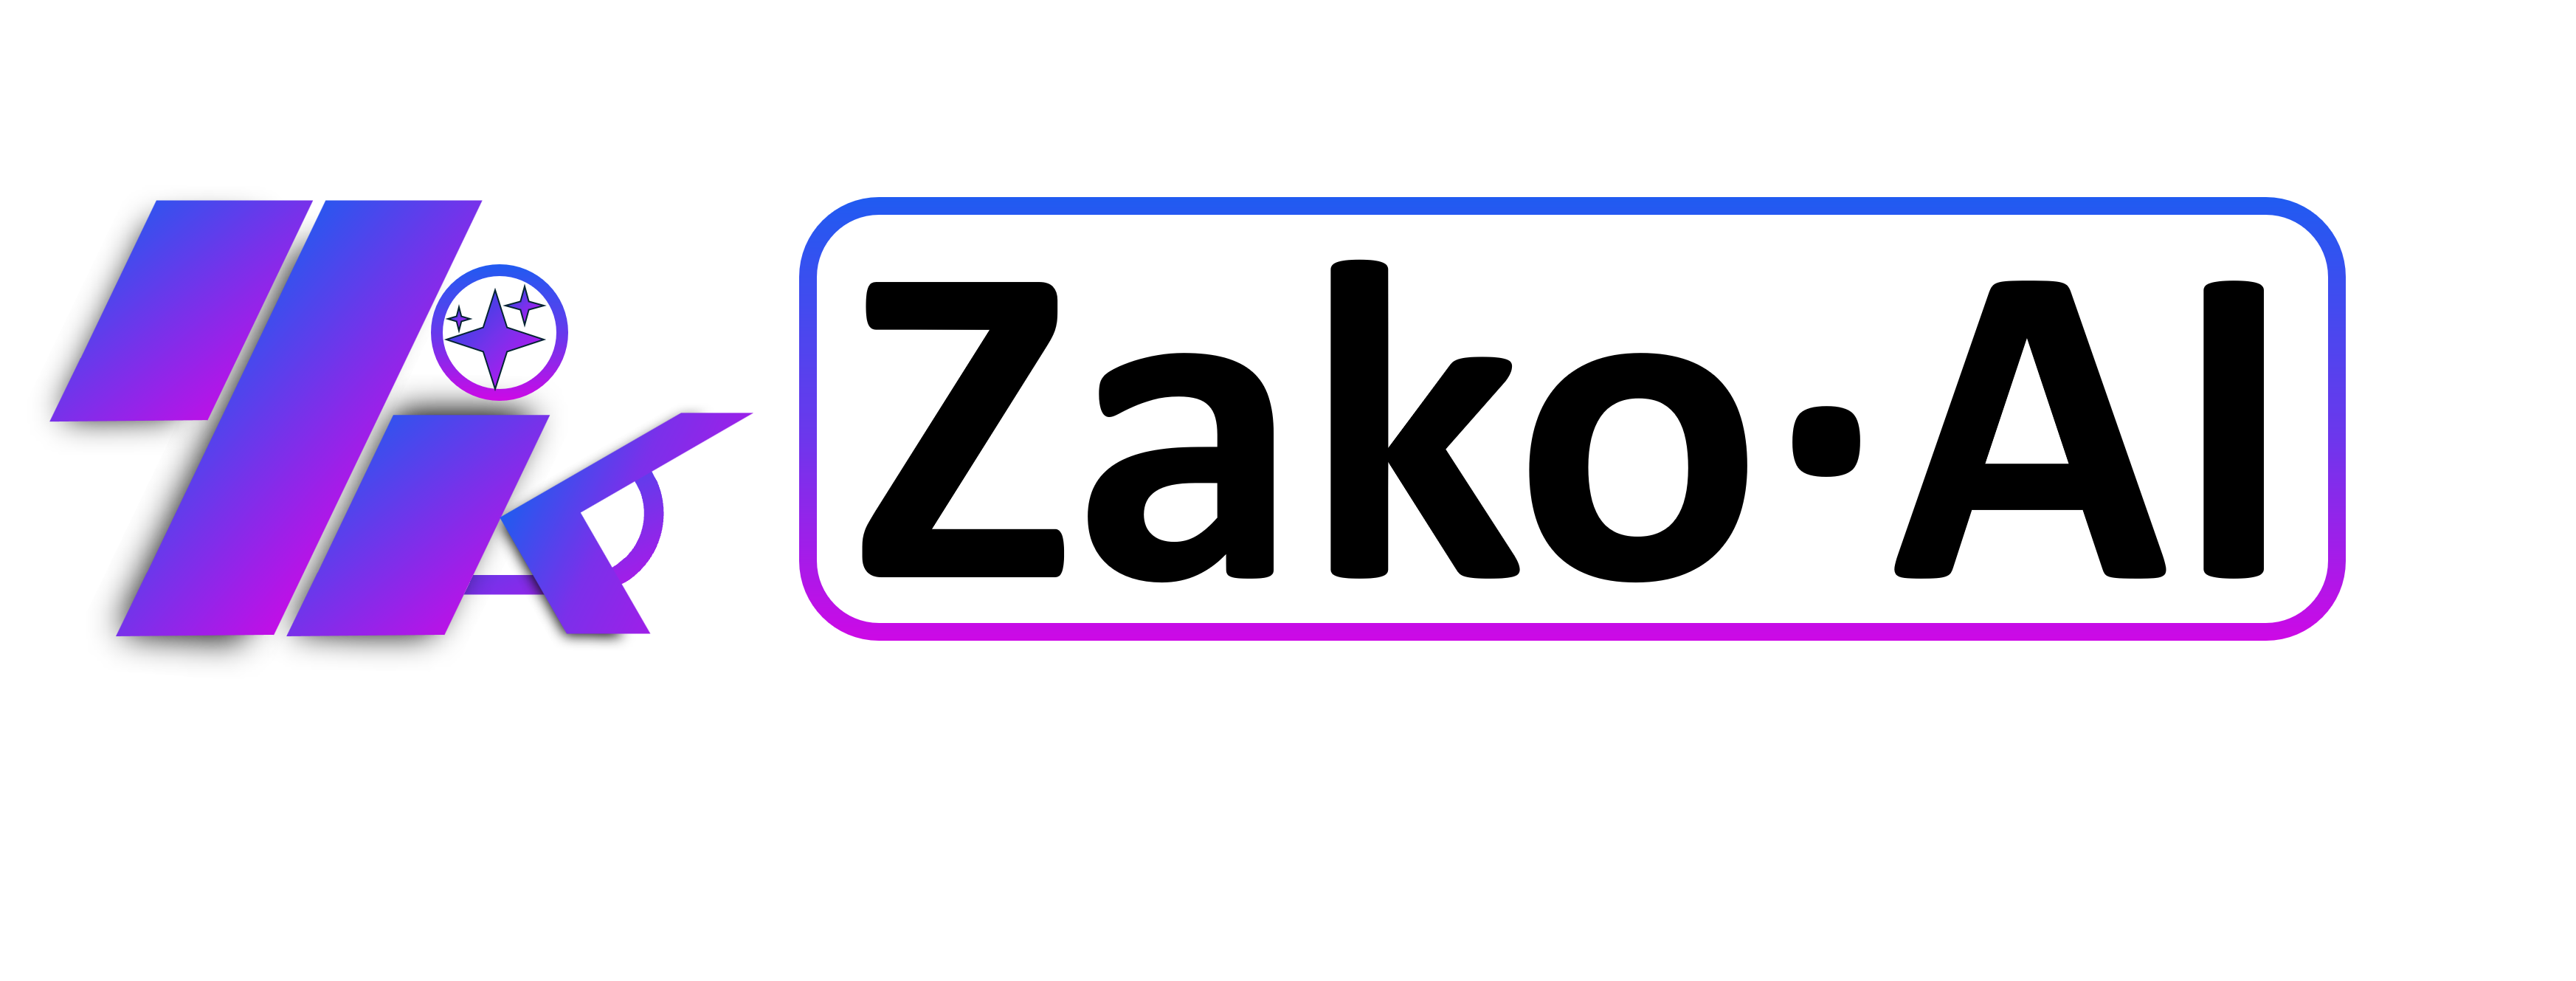

# DataFrame yaratish  
Biz Python'dagi boshqa ma'lumot tuzilmalardan, CSV fayllarini o'qish va ma'lumotlar bazasidan so'rov qilish orqali `DataFrame` obyektlarini yaratamiz.  

## Ma'lumotlar haqida  
Ushbu daftarda biz 2018-yil 18-sentabrdan 13-oktabrgacha bo'lgan zilzilalar ma'lumotlari bilan ishlaymiz (AQSh Geologiya Xizmatining [USGS API](https://earthquake.usgs.gov/fdsnws/event/1/) orqali olingan).  

## Importlar  


In [20]:
import datetime as dt
import numpy as np
import pandas as pd

## `Series` obyektini (object) yaratish

In [21]:
np.random.seed(0) # set a seed for reproducibility
pd.Series(np.random.rand(5), name='random')

0    0.548814
1    0.715189
2    0.602763
3    0.544883
4    0.423655
Name: random, dtype: float64

## `Series` dan  `DataFrame` yaratish;
`to_frame()` metodini ishlating:

In [22]:
pd.Series(np.linspace(0, 10, num=5)).to_frame()

,0
0,0.0
1,2.5
2,5.0
3,7.5
4,10.0


## Python ma'lumot strukturalaridan `DataFrame` yaratish  
### `list` yoki `dictionary` dan `DataFrame` yaratish  
Dictionary qiymatlari listlar, NumPy array'lar va shunga o'xshash uzunlikka ega ma'lumotlar bo'lishi mumkin (generatorlar uzunlikka ega emasligi sababli ularni bu yerda ishlatib bo'lmaydi): 

In [9]:
np.random.seed(0) # set seed so result is reproducible
pd.DataFrame(
    {
        'random': np.random.rand(5),
        'text': ['hot', 'warm', 'cool', 'cold', None],
        'truth': [np.random.choice([True, False]) for _ in range(5)]
    }, 
    index=pd.date_range(
        end=dt.date(2025, 1, 21),
        freq='1D',
        periods=5, 
        name='date'
    )
)

,random,text,truth
date,,,
2025-01-17,0.548814,hot,False
2025-01-18,0.715189,warm,True
2025-01-19,0.602763,cool,True
2025-01-20,0.544883,cold,False
2025-01-21,0.423655,None,True


### List ichida joylashgan `dictionary`larda foydalanib yaratish

In [11]:
pd.DataFrame([
    {'mag': 5.2, 'place': 'California'},
    {'mag': 1.2, 'place': 'Tashkent'},
    {'mag': 0.2, 'place': 'California'},
])

,mag,place
0,5.2,California
1,1.2,Tashkent
2,0.2,California


### List ichidagi `tuple`lardan dataframe yaratish

In [12]:
list_of_tuples = [(n, n**2, n**3) for n in range(5)]
list_of_tuples

[(0, 0, 0), (1, 1, 1), (2, 4, 8), (3, 9, 27), (4, 16, 64)]

In [13]:
pd.DataFrame(
    list_of_tuples, 
    columns=['n', 'n_squared', 'n_cubed']
)

,n,n_squared,n_cubed
0,0,0,0
1,1,1,1
2,2,4,8
3,3,9,27
4,4,16,64


### NumPy arrayidan yaratish

In [14]:
pd.DataFrame(
    np.array([
        [0, 0, 0],
        [1, 1, 1],
        [2, 4, 8],
        [3, 9, 27],
        [4, 16, 64]
    ]), columns=['n', 'n_squared', 'n_cubed']
)

,n,n_squared,n_cubed
0,0,0,0
1,1,1,1
2,2,4,8
3,3,9,27
4,4,16,64


## `DataFrame` obyektini (object) CSV fayl konentidan yaratish

`read_csv()`, `read_excel()` va h.k.  (https://pandas.pydata.org/docs/user_guide/io.html)

In [ ]:
df = pd.read_csv('../data/earthquakes.csv')

Note that we can also pass in a URL. Let's read this same file from GitHub:

In [18]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/Zako-ai/CourseMaterials/refs/heads/main/DataAnalysis-1/data/earthquakes.csv'
)

In [19]:
df

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
0,NaN,NaN,37389218,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.008693,NaN,85.0,",ci37389218,",1.35,ml,...,",ci,",automatic,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475395144,https://earthquake.usgs.gov/earthquakes/eventp...
1,NaN,NaN,37389202,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.020030,NaN,79.0,",ci37389202,",1.29,ml,...,",ci,",automatic,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475253925,https://earthquake.usgs.gov/earthquakes/eventp...
2,NaN,4.4,37389194,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.021370,28.0,21.0,",ci37389194,",3.42,ml,...,",ci,",automatic,1539475062610,"M 3.4 - 8km NE of Aguanga, CA",0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0,1539536756176,https://earthquake.usgs.gov/earthquakes/eventp...
3,NaN,NaN,37389186,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.026180,NaN,39.0,",ci37389186,",0.44,ml,...,",ci,",automatic,1539474978070,"M 0.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475196167,https://earthquake.usgs.gov/earthquakes/eventp...
4,NaN,NaN,73096941,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.077990,NaN,192.0,",nc73096941,",2.16,md,...,",nc,",automatic,1539474716050,"M 2.2 - 10km NW of Avenal, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0,1539477547926,https://earthquake.usgs.gov/earthquakes/eventp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9327,NaN,NaN,73086771,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.018060,NaN,185.0,",nc73086771,",0.62,md,...,",nc,",reviewed,1537230228060,"M 0.6 - 9km ENE of Mammoth Lakes, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1537285598315,https://earthquake.usgs.gov/earthquakes/eventp...
9328,NaN,NaN,38063967,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.030410,NaN,50.0,",ci38063967,",1.00,ml,...,",ci,",reviewed,1537230135130,"M 1.0 - 3km W of Julian, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0,1537276800970,https://earthquake.usgs.gov/earthquakes/eventp...
9329,NaN,NaN,2018261000,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.452600,NaN,276.0,",pr2018261000,",2.40,md,...,",pr,",reviewed,1537229908180,"M 2.4 - 35km NNE of Hatillo, Puerto Rico",0,earthquake,",geoserve,origin,phase-data,",-240.0,1537243777410,https://earthquake.usgs.gov/earthquakes/eventp...
9330,NaN,NaN,38063959,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.018650,NaN,61.0,",ci38063959,",1.10,ml,...,",ci,",reviewed,1537229545350,"M 1.1 - 9km NE of Aguanga, CA",0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",-480.0,1537230211640,https://earthquake.usgs.gov/earthquakes/eventp...


Pandas odatda kirish ma'lumotlariga asoslanib qaysi parametrlarni ishlatishni yaxshi aniqlaydi, shuning uchun ko'pincha chaqiruvga argumentlarni qo'shishimiz kerak bo'lmaydi; ammo, ba'zi holatlarda kerak bo'lishi mumkin bo'lgan ko'plab variantlar mavjud, ulardan ba'zilari quyidagilar:

| Parametr    | Maqsad |
|-------------|--------|
| `sep`       | Delimiterni aniqlaydi |
| `header`    | Ustun nomlari joylashgan qator raqami; default holatda `pandas` ularning mavjudligini aniqlaydi |
| `names`     | Foydalaniladigan ustun nomlari ro'yxati |
| `index_col` | Indeks sifatida ishlatiladigan ustun |
| `usecols`   | Qaysi ustunlarni o'qish kerakligini aniqlaydi |
| `dtype`     | Ustunlar uchun ma'lumot turini aniqlaydi |
| `converters`| Muayyan ustunlardagi ma'lumotlarni o'zgartirish uchun funksiyalarni belgilaydi |
| `skiprows`  | O'tkazib yuboriladigan qatordagi sonlar |
| `nrows`     | Bir vaqtning o'zida o'qiladigan qatorlar soni (file'ni bir necha bo'laklarga ajratish uchun `skiprows` bilan birga ishlating) |
| `parse_dates` | Sanalarni o'z ichiga olgan ustunlarni avtomatik ravishda datetime obyektlariga aylantiradi |
| `chunksize` | Faylni bo'laklarga ajratib o'qish uchun |
| `compression` | Fayllarni oldindan chiqarib yuborishsiz siqilgan holatda o'qish |
| `encoding`  | Faylning kodlashini belgilaydi |

## `DataFrame` Ob'ektini CSV Fayliga Yozish
`df`ning indekslari faqat qator raqamlari bo'lgani uchun, biz uni saqlamoqchi emasmiz. Shuning uchun, `to_csv()` metodiga `index=False` parametrini beramiz:


In [18]:
df.to_csv('output.csv', index=False)

## `DataFrame` ob'ektini ma'lumotlar bazasiga yozish
E'tibor bering, `if_exists` parametri mavjud. Standart holda, agar mavjud jadvalga yozishga harakat qilsangiz, xato beradi. Bu yerda biz jadvalning ustiga yozilishiga ahamiyat bermaymiz.Agar yangi satrlarni qo'shishni xohlasak, uni `'append'` sifatida belgilaymiz.


In [19]:
import sqlite3

with sqlite3.connect('data/quakes.db') as connection:
    pd.read_csv('data/tsunamis.csv').to_sql(
        'tsunamis', connection, index=False, if_exists='replace'
    )

## Ma'lumotlar bazasidan (DB) so'rov (query) qilish orqali `DataFrame` ob'ektini yaratish
SQLite databasedan foydalanish. Alternativ sifatida [SQLAlchemy](https://www.sqlalchemy.org/)ni o'rnatib ishlatsak ham bo'ladi.


In [20]:
import sqlite3

with sqlite3.connect('data/quakes.db') as connection:
    tsunamis = pd.read_sql('SELECT * FROM tsunamis', connection)

tsunamis.head()

,alert,type,title,place,magType,mag,time
0,None,earthquake,"M 5.0 - 165km NNW of Flying Fish Cove, Christm...","165km NNW of Flying Fish Cove, Christmas Island",mww,5.0,1539459504090
1,green,earthquake,"M 6.7 - 262km NW of Ozernovskiy, Russia","262km NW of Ozernovskiy, Russia",mww,6.7,1539429023560
2,green,earthquake,"M 5.6 - 128km SE of Kimbe, Papua New Guinea","128km SE of Kimbe, Papua New Guinea",mww,5.6,1539312723620
3,green,earthquake,"M 6.5 - 148km S of Severo-Kuril'sk, Russia","148km S of Severo-Kuril'sk, Russia",mww,6.5,1539213362130
4,green,earthquake,"M 6.2 - 94km SW of Kokopo, Papua New Guinea","94km SW of Kokopo, Papua New Guinea",mww,6.2,1539208835130


<hr>
<div>
    <a href="./1-pandas_data_structures.ipynb">
        <button style="float: left;">&#8592; Previous Notebook</button>
    </a>
    <a href="./3-making_dataframes_from_api_requests.ipynb">
        <button style="float: right;">Next Notebook &#8594;</button>
    </a>
</div>
<br>
<hr>